In [1]:
import pandas as pd
import numpy as num
import scipy as sc
import matplotlib.pyplot as mtp
import seaborn as sb
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
ds = pd.read_csv('UCI_Credit_Card.csv')
ds

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
#удаление лишних столбцов
ds = ds.drop(['ID', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month'], axis='columns')
ds

,LIMIT_BAL,AGE,BILL_AMT1
0,20000.0,24,3913.0
1,120000.0,26,2682.0
2,90000.0,34,29239.0
3,50000.0,37,46990.0
4,50000.0,57,8617.0
...,...,...,...
29995,220000.0,39,188948.0
29996,150000.0,43,1683.0
29997,30000.0,37,3565.0
29998,80000.0,41,-1645.0


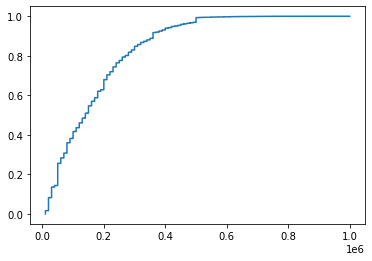

In [4]:
#эмпирическая функция распределения и гистограмма для LIMIT_BAL
ecdf = ECDF(ds['LIMIT_BAL'])
mtp.step(ecdf.x, ecdf.y)

(array([4.311e+03, 4.921e+03, 3.266e+03, 2.792e+03, 2.336e+03, 2.752e+03,
        2.555e+03, 1.109e+03, 1.395e+03, 7.580e+02, 1.400e+03, 6.010e+02,
        3.290e+02, 4.040e+02, 8.650e+02, 4.900e+01, 4.500e+01, 3.300e+01,
        2.700e+01, 1.300e+01, 1.600e+01, 1.100e+01, 7.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10000.,   43000.,   76000.,  109000.,  142000.,  175000.,
         208000.,  241000.,  274000.,  307000.,  340000.,  373000.,
         406000.,  439000.,  472000.,  505000.,  538000.,  571000.,
         604000.,  637000.,  670000.,  703000.,  736000.,  769000.,
         802000.,  835000.,  868000.,  901000.,  934000.,  967000.,
        1000000.]),
 <BarContainer object of 30 artists>)

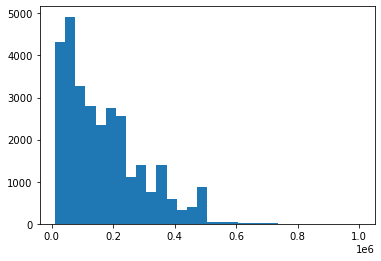

In [5]:
mtp.hist(ds['LIMIT_BAL'], bins=30)

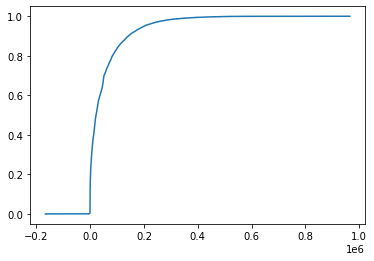

In [6]:
ecdf = ECDF(ds['BILL_AMT1'])
mtp.step(ecdf.x, ecdf.y)

(array([2.0000e+00, 2.1885e+04, 6.0070e+03, 1.5340e+03, 3.9700e+02,
        1.4300e+02, 2.7000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-165580. ,  -52570.9,   60438.2,  173447.3,  286456.4,  399465.5,
         512474.6,  625483.7,  738492.8,  851501.9,  964511. ]),
 <BarContainer object of 10 artists>)

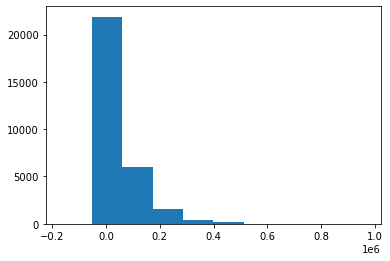

In [7]:
mtp.hist(ds['BILL_AMT1'], bins=10)

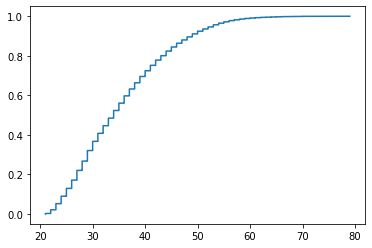

In [8]:
ecdf = ECDF(ds['AGE'])
mtp.step(ecdf.x, ecdf.y)

(array([2.685e+03, 5.328e+03, 5.375e+03, 4.529e+03, 3.809e+03, 2.988e+03,
        2.154e+03, 1.203e+03, 1.085e+03, 5.050e+02, 1.980e+02, 9.600e+01,
        3.300e+01, 1.100e+01, 1.000e+00]),
 array([21.        , 24.86666667, 28.73333333, 32.6       , 36.46666667,
        40.33333333, 44.2       , 48.06666667, 51.93333333, 55.8       ,
        59.66666667, 63.53333333, 67.4       , 71.26666667, 75.13333333,
        79.        ]),
 <BarContainer object of 15 artists>)

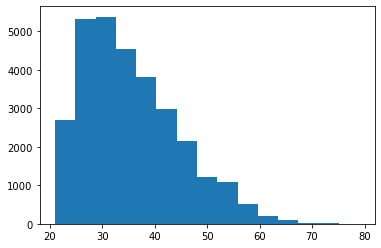

In [9]:
mtp.hist(ds['AGE'], bins=15)

,sumsquare_error,aic,bic,kl_div
lognorm,9.881073e-11,inf,-1.000372e+06,inf
cauchy,2.807984e-10,3282.474993,-9.690495e+05,inf
rayleigh,4.665667e-10,inf,-9.538166e+05,inf
norm,5.479721e-10,6628.441667,-9.489919e+05,inf
expon,8.567100e-10,2982.600860,-9.355856e+05,inf


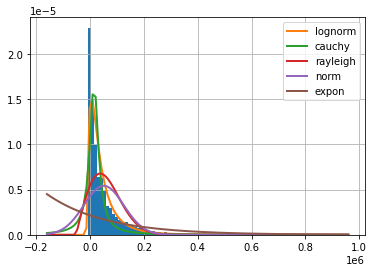

In [10]:
#Проанализируйте распределение признака.
from fitter import Fitter, get_common_distributions, get_distributions

fit = Fitter(ds['BILL_AMT1'], distributions = get_common_distributions())
fit.fit()
fit.summary()

#в данном случае получилось нормальное распределение, распределение унимодальное, так как мы видим одно явное значение

,sumsquare_error,aic,bic,kl_div
gamma,0.042527,998.766885,-403966.291813,inf
chi2,0.042527,998.767220,-403966.278897,inf
lognorm,0.043270,997.987711,-403446.532808,inf
rayleigh,0.043965,1102.761194,-402978.943064,inf
norm,0.046965,1209.857608,-400998.330463,inf


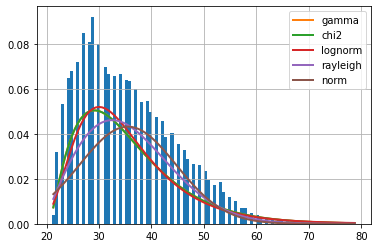

In [19]:
fit = Fitter(ds['AGE'], distributions = get_common_distributions())
fit.fit()
fit.summary()

#в данном случае получилось нормальное распределение, распределение унимодальное, так как мы видим одно явное lognorm

,sumsquare_error,aic,bic,kl_div
gamma,1.141703e-10,3051.188759,-996037.552423,inf
exponpow,1.234864e-10,3353.910111,-993684.359027,inf
expon,1.242732e-10,3026.050241,-993504.121061,inf
rayleigh,1.478954e-10,3472.056659,-988283.435456,inf
chi2,1.639749e-10,3653.108145,-985176.892530,inf


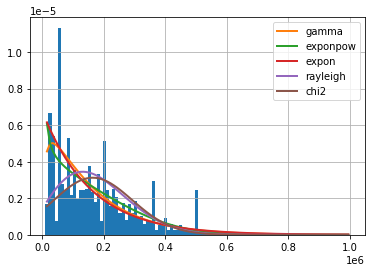

In [21]:
fit = Fitter(ds['LIMIT_BAL'], distributions = get_common_distributions())
fit.fit()
fit.summary()

#в данном случае получилось нормальное распределение, распределение унимодальное, так как мы видим одно явное gamma

In [13]:
#краткая статистическая информация по 3 столбцам
ds.describe()

,LIMIT_BAL,AGE,BILL_AMT1
count,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900
std,129747.661567,9.217904,73635.860576
min,10000.000000,21.000000,-165580.000000
25%,50000.000000,28.000000,3558.750000
50%,140000.000000,34.000000,22381.500000
75%,240000.000000,41.000000,67091.000000
max,1000000.000000,79.000000,964511.000000


In [22]:
#7 Для каждого признака найдите выборочные моменты (начальные и центральные), можно вычислить также коэффициенты асимметрии и эксцесса.
print(ds["LIMIT_BAL"].skew())
print(ds["LIMIT_BAL"].kurt())
print(ds["BILL_AMT1"].skew())
print(ds["BILL_AMT1"].kurt())
print(ds["AGE"].skew())
print(ds["AGE"].kurt())

0.992866960519544
0.536262896398668
2.6638610220232612
9.806289341330837
0.7322458687830562
0.04430337823580954


<AxesSubplot:>

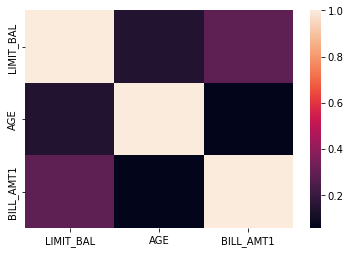

In [16]:
#И, наконец, с помощью функций пакетов pandas и seaborn постройте тепловую карту (heatmap) корреляций признаков.
sb.heatmap(ds.corr())